In [31]:
import numpy as np
import librosa
import librosa, librosa.display
import matplotlib.pyplot as plt
import IPython.display

FIG_SIZE=(15,10)

In [14]:
file = "/content/blues.00000.wav"

In [15]:
sig, sr = librosa.load(file, sr=22050)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] (661794,)


In [32]:
IPython.display.Audio(data=sig, rate=sr)

# Wavefrom 시각화

Text(0.5, 1.0, 'Waveform')

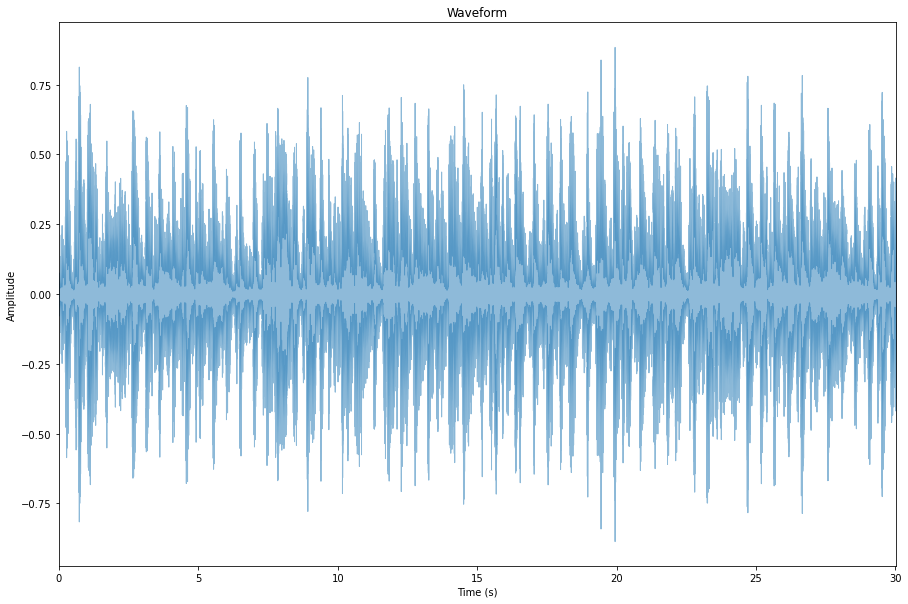

In [19]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

#단순 푸리에 변환 -> Spectrum

Text(0.5, 1.0, 'Power spectrum')

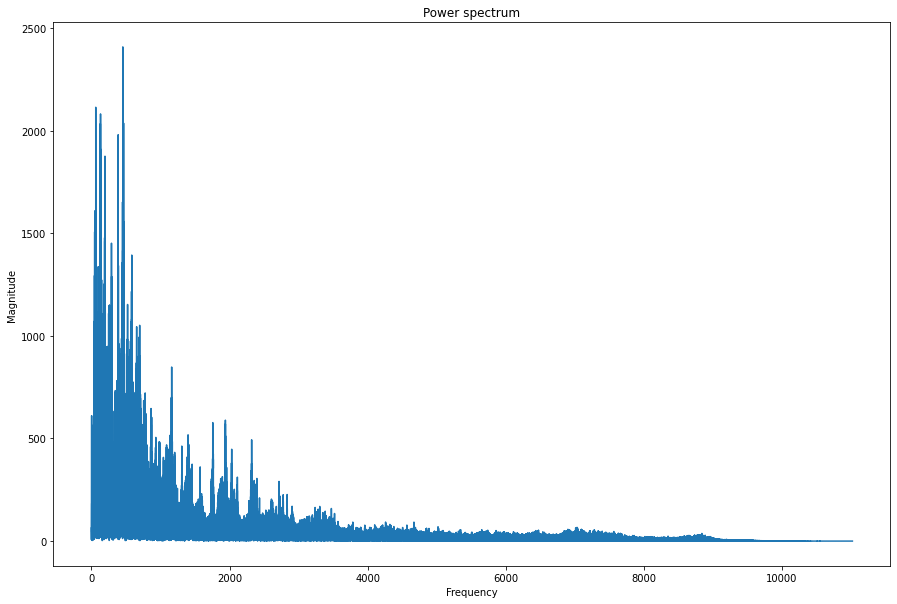

In [20]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

###푸리에 변환 결과는 복소공간에 형성되어 실수부와 허수부로 나뉘게 된다. 이 값을 절댓값을 취해 magnitude로 사용한다. Frequency는 초당 주기의 반복 빈도 수 이므로, 초당 샘플갯수인 sr보다 클 수 없다. 따라서 0 ~ frequency 사이에서 len(magnitude) 만큼 frequency domain을 만들어 주자.

#STFT -> Spectrogram

###STFT는 단순 푸리에 변환과 다르게 시간 정보를 보존하기 위해, frame 단위로 FFT를 수행한다. 따라서 frame 수와 frame 당 sample 수를 지정해주어야 한다. 또한 Spectrogram에서는 dB 값을 사용하므로, 푸리에 변환의 결과인 magnitude에 로그 Scaling을 통해 dB로 변환해준다.

Text(0.5, 1.0, 'Spectrogram (dB)')

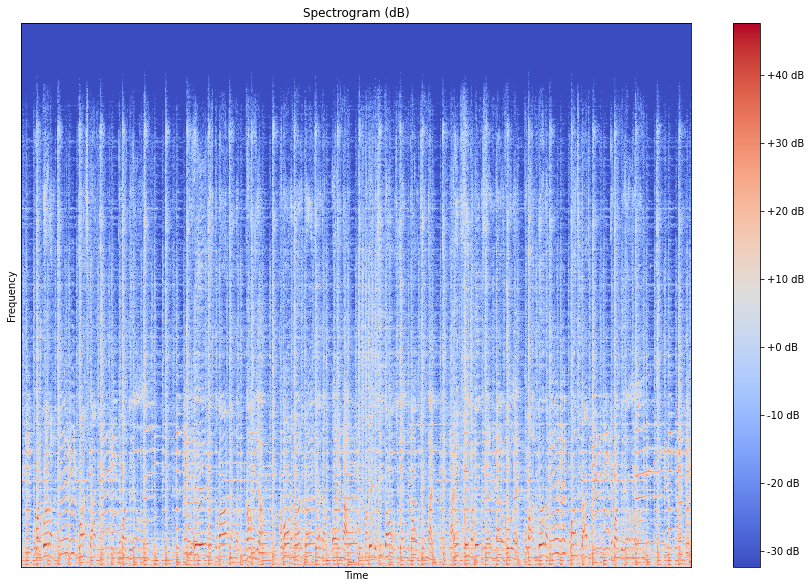

In [21]:
# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

#MFCC

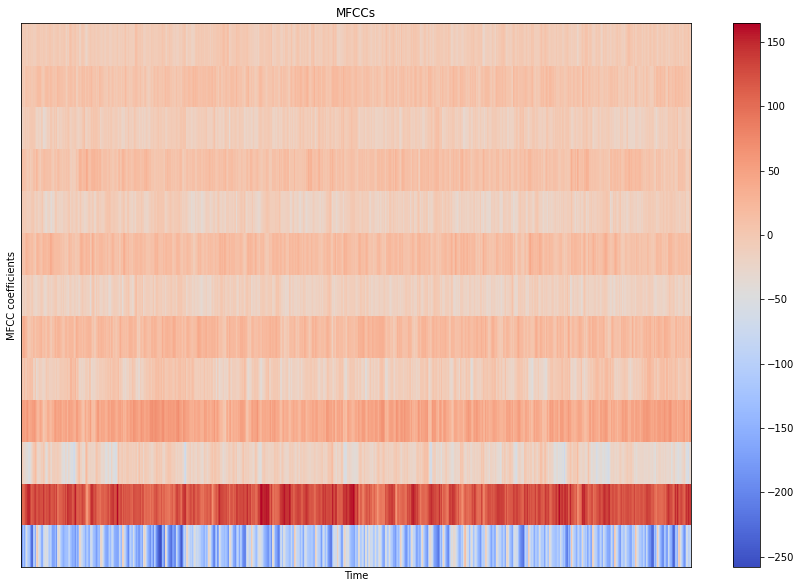

In [36]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(sig, sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [48]:
IPython.display.Audio(data=MFCCs,rate=sr)
